In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import netCDF4 as cdf
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar
import csv
from mpl_toolkits.basemap import Basemap
import pickle
import itertools
from __future__ import division
from maptools import select_map

In [3]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
mask = mf.variables['regionmask'][:]

'''
file_vector = ['/Users/botia/sibcasa_layers/00-SiB/',
              '/Users/botia/sibcasa_layers/01-EBF/',
              '/Users/botia/sibcasa_layers/02-DBF/',
              '/Users/botia/sibcasa_layers/03-MiF/',
              '/Users/botia/sibcasa_layers/04-NLF/',
              '/Users/botia/sibcasa_layers/05-DNF/',
              '/Users/botia/sibcasa_layers/06-ShV/',
              '/Users/botia/sibcasa_layers/07-GrC/',
              '/Users/botia/sibcasa_layers/08-XXX/',
              '/Users/botia/sibcasa_layers/09-Shr/',
              '/Users/botia/sibcasa_layers/10-Tun/',
              '/Users/botia/sibcasa_layers/11-Des/',
              '/Users/botia/sibcasa_layers/12-Crop/',
              '/Users/botia/sibcasa_layers/13-Ice/']

file_vector = ['/Users/botia/sibcasa_layers/01-EBF/hsib_201009.qp2.nc', # 0 Evergreen broadleef forest
              '/Users/botia/sibcasa_layers/02-DBF/hsib_201009.qp2.nc', # 1 decidous broadleaf forest
              '/Users/botia/sibcasa_layers/03-MiF/hsib_201009.qp2.nc', # 2 Tall broadleaf and needleleafMixed forest
              '/Users/botia/sibcasa_layers/04-NLF/hsib_201009.qp2.nc', # 3 Needleaf forest
              '/Users/botia/sibcasa_layers/05-DNF/hsib_201009.qp2.nc', # 4 deciduos needleleaf forest
              '/Users/botia/sibcasa_layers/06-ShV/hsib_201009.qp2.nc', # 5 Short Vegetation
              '/Users/botia/sibcasa_layers/07-GrC/hsib_201009.qp2.nc', # 6 Grasslands
              '/Users/botia/sibcasa_layers/08-XXX/hsib_201009.qp2.nc', # 7 No biome specified
              '/Users/botia/sibcasa_layers/09-Shr/hsib_201009.qp2.nc', # 8 Shrubs
              '/Users/botia/sibcasa_layers/10-Tun/hsib_201009.qp2.nc', # 9 Tundra
              '/Users/botia/sibcasa_layers/11-Des/hsib_201009.qp2.nc', # 10 Desert
              '/Users/botia/sibcasa_layers/12-Crop/hsib_201009.qp2.nc', # 11 Crops
              '/Users/botia/sibcasa_layers/13-Ice/hsib_201009.qp2.nc'] # 12 Ice

# Here I organized the vector in such a way that it makes the switch of biomes: SiBCASA to CASA
'''
# for erikscode
file_vector = ['/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 0
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 1  
               '/Users/botia/sibcasa_layers/01-EBF/hsib_200901.qp2.nc', # 2
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 3
               '/Users/botia/sibcasa_layers/02-DBF/hsib_200901.qp2.nc', # 4
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 5
               '/Users/botia/sibcasa_layers/09-Shr/hsib_200901.qp2.nc', # 6
               '/Users/botia/sibcasa_layers/07-GrC/hsib_200901.qp2.nc', # 7
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 8
               '/Users/botia/sibcasa_layers/12-Crop/hsib_200901.qp2.nc', # 9
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 10
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc', # 11
               '/Users/botia/sibcasa_layers/13-Ice/hsib_200901.qp2.nc'] # 12



# general to generate the emissions
'''
file_vector = ['/Users/botia/sibcasa_layers/13-Ice/', # 0
               '/Users/botia/sibcasa_layers/13-Ice/', # 1  
               '/Users/botia/sibcasa_layers/01-EBF/', # 2
               '/Users/botia/sibcasa_layers/13-Ice/', # 3
               '/Users/botia/sibcasa_layers/02-DBF/', # 4
               '/Users/botia/sibcasa_layers/13-Ice/', # 5
               '/Users/botia/sibcasa_layers/09-Shr/', # 6
               '/Users/botia/sibcasa_layers/07-GrC/', # 7
               '/Users/botia/sibcasa_layers/13-Ice/', # 8
               '/Users/botia/sibcasa_layers/12-Crop/', # 9
               '/Users/botia/sibcasa_layers/13-Ice/', # 10
               '/Users/botia/sibcasa_layers/13-Ice/', # 11
               '/Users/botia/sibcasa_layers/13-Ice/'] # 12
'''
                                             # Correspondent Biomes in SiBCASA 
biomes_casa=['Water',                        #0 = No biome Specified
             'Evergreen needleleaf forest',  #1 = Tall Needleleaf trees
             'Evergreen broadleaf forest',   #2 = Tall Broadleaf Evergeen Trees
             'Deciduous needleleaf forest',  #3 = Tall Needleleaf- Decidous Trees
             'Deciduous broadleaf forest',   #4 = Tall broadleaf decidous trees
             'Mixed forests',                #5 = No biome specified
             'Shrublands',                   #6 = Short broadleaf shrubs with bare soil
             'Savanna and grasslands',       #7 = Grasslands
             'Permanent wetlands',           #8 = No biome specified
             'Croplands',                    #9 = Agriculture
             'Urban and built-up',           #10 = No biome specified or ice
             'Barren or sparsely vegetated', #11 = Short broadleaf shrubs with bare soil
             'Permanent snow and ice']       #12 = No biome specified or ice

biome_names = ['13-Ice','13-Ice','01-EBF','13-Ice','02-DBF','13-Ice','09-Shr',
               '07-GrC','13-Ice','12-Crop','13-Ice','13-Ice','13-Ice'] 

<type 'numpy.ndarray'> (180, 360)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


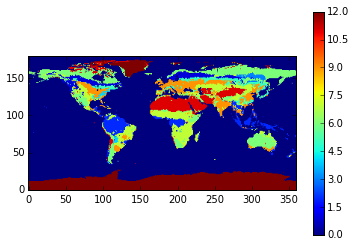

In [4]:
# Import the CASA landcover

ff='/Users/botia/biomecomparison/Landcover2.csv'
biomesmap=[]

with open(ff,'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        biomesmap.append([float(item) for item in row]) 
        
biomesmap = np.array(biomesmap)
biomesmap = biomesmap[::-1]
biomes_casa_1x1 = np.zeros((180,360),float)

for i in range(180):
    for j in range(360):
        lst = biomesmap[i+i:(i+1)*2,j+j:(j+1)*2].flatten().tolist()
        biomes_casa_1x1[i,j]=max(set(lst), key=lst.count)
        
imshow(biomes_casa_1x1)
colorbar()
plt.gca().invert_yaxis()
print type(biomes_casa_1x1), shape(biomes_casa_1x1)

(180, 360)


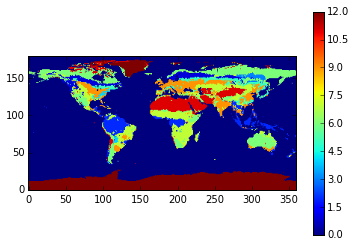

In [5]:
#Checking the reaasignation of biomes
casa_biome_conf = np.zeros((180,360),float)
file_vector2 = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(180):
    for j in range(360):
        biome = int(biomes_casa_1x1[i,j])
        casa_biome_conf[i,j] = file_vector2[biome]
        
print shape(casa_biome_conf)
imshow(casa_biome_conf)
colorbar()
plt.gca().invert_yaxis()

set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0])


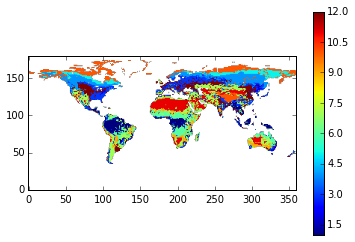

In [6]:
# Import SiBCASA biomes
f = cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/regions_sibcasa.nc') 
biomes_sib= f.variables['land_ecosystems'][:]  
f.close() 
imshow(biomes_sib)
colorbar()
plt.gca().invert_yaxis()
biomes_sib[np.where(biomes_sib.mask)] = 0
numbers = []
for i in range(180):
    for j in range(360):
        numbers.append(biomes_sib[i][j])
print set(numbers)

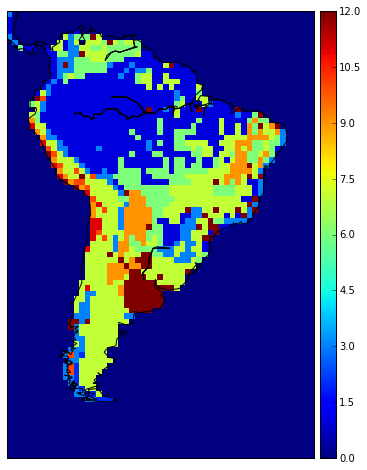

In [7]:
# Zoom and confirmation of map
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()
m.pcolormesh(xx,yy,biomes_sib) # use biomes_sib or casa_biome_conf
m.bluemarble()
m.colorbar()
plt.show()

In [8]:
# Areas modification to shape 14538

glarea = globarea(im=360,jm=180)
filename = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-Sib',2010,1)
d = cdf.Dataset(filename)
lat = d.variables['latindex'][:]
lon = d.variables['lonindex'][:]
d.close()
areas = []
for i in range(14538):
    areas.append(glarea[lat[i]-1][lon[i]-1])
print len(areas), shape(areas)
print glarea[1,2],glarea[1][2], sum(areas), sum(areas)/glarea.sum()

def fire_to_1x1(fire,latindex,lonindex):
    fire1x1 = np.zeros((180,360),float)
    for i in range(14538):
        lat=latindex[i]
        lon=lonindex[i]
        fire1x1[lat-1,lon-1]=fire[0,i]
    return fire1x1


14538 (14538,)
323655840.531 323655840.531 1.30466716479e+14 0.255784755976


In [9]:

# old - new run check...

oldfi = '/Users/botia/sibcasa_layers/01-EBF/hsib_201503.qp2.nc'      # michiel first run
#newfi = '/Users/botia/sibcasa_layers/01-EBF-New/hsib_201503.qp2.nc'  # michiel second run
newfi = '/Users/botia/mnt/promise/CO2/erikvs/forSantiago/01-EBF/hsib_201503.qp2.nc'


oldf = cdf.Dataset(oldfi)
newf = cdf.Dataset(newfi)

fireold = oldf.variables['fire'][:]
firenew = newf.variables['fire'][:]

conf = fireold - firenew
conf.sum()


3.5591537519689211

In [10]:
# Global emissions check and amazon check with the standard sibcasa run
# change range and division.....
minyear = 2015
maxyear = 2016
for y in range(minyear,maxyear):
    #print y
    fire_month  = []
    fire_annual = np.zeros((180,360),float)
    for k in range(1,13):
        filename = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-SiB',y,k)
        d = cdf.Dataset(filename)
        fire = d.variables['fire'][:] # The fire rate for each land points (umol/m2 s) shape = (1,14538)
        latindex = d.variables['latindex'][:]
        lonindex = d.variables['lonindex'][:]
        
        fire_month_all = fire*areas*(86400*365)*12*1e-6*1e-15 #PgC/yr
        fire_month_1x1 = fire_to_1x1(fire,latindex,lonindex)*glarea*(86400*365)*12*1e-6*1e-15
        
        fire_annual = fire_annual + fire_month_1x1 # for each pixel
        fire_month.append(fire_month_all.sum()) #dding spatially
    
    print y, mean(fire_month), ((fire_annual).sum())/12,((fire_annual*mask).sum())/12 # time average
# compare it to carbontracker.eu = they are the same: OK

2015 2.03229991245 2.03229991245 0.321822624649


In [11]:
#Function that calculates the annual emissions and returns the annual emissions per pixel for a given biome and year

def annual_biome_emission(biome,y):
    fire_annual = np.zeros((180,360),float)
    for k in range(1,13):
        ff = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','%s'%(biome),y,k)
        f = cdf.Dataset(ff)
        fire = f.variables['fire'][:] # 1,14538 in umol/m2/s
        latindex = f.variables['latindex'][:]
        lonindex = f.variables['lonindex'][:]
        fire_month_1x1 = fire_to_1x1(fire,latindex,lonindex)*glarea*(86400*365)*12*1e-6*1e-15 #PgC/yr per pixel
        fire_annual = fire_annual + fire_month_1x1 # for each pixel
    
    return fire_annual


In [12]:
# Function that calculates the monthly emissions and returns the monthly emissions per pixel for a given biome and year
def monthly_biome_emission(biome,y):
    fire_month = np.zeros((13,180,360),float) # 0 has no values
    for k in range(1,13):
        ff = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','%s'%(biome),y,k)
        f = cdf.Dataset(ff)
        fire = f.variables['fire'][:] # 1,14538 in umol/m2/s
        latindex = f.variables['latindex'][:]
        lonindex = f.variables['lonindex'][:]
        fire_month_1x1 = fire_to_1x1(fire,latindex,lonindex)*glarea*(86400*365)*12*1e-6*1e-15 #PgC/yr per pixel
        fire_month[k] = fire_month_1x1 # for each pixel

    return fire_month #, fire_month.sum(axis=1).sum(axis=1)
    

# This has to be run always that info for a certain year wants to be generated

In [29]:
# Annual emissions per pixel:
y = 2010

ice = annual_biome_emission('13-Ice',y)
#ebf = annual_biome_emission('01-EBF',y)
ebf = annual_biome_emission('01-EBF-erik',y)
#dbf = annual_biome_emission('02-DBF',y)
dbf = annual_biome_emission('02-DBF-erik',y)
#shr = annual_biome_emission('09-Shr',y)
shr = annual_biome_emission('09-Shr-erik',y)
#grs = annual_biome_emission('07-GrC',y)
grs = annual_biome_emission('07-GrC-erik',y)
#crp = annual_biome_emission('12-Crop',y)
crp = annual_biome_emission('12-Crop-erik',y)

mix = annual_biome_emission('03-MiF',y)
nlf = annual_biome_emission('04-NLF',y)
dnf = annual_biome_emission('05-DNF',y)
#shv = annual_biome_emission('06-ShV',y) # this is Savanna according to IVAR
shv = annual_biome_emission('06-ShV-erik',y)
tun = annual_biome_emission('10-Tun',y)
des = annual_biome_emission('11-Des',y)
shtv = annual_biome_emission('08-XXX',y) # this corresponds to short vegetation (none)    


In [51]:
# Monthly emissions per pixel:
y = 2015

ice_monthly = monthly_biome_emission('13-Ice',y)
#ebf_monthly = monthly_biome_emission('01-EBF',y)
ebf_monthly = monthly_biome_emission('01-EBF-erik',y)
#dbf_monthly = monthly_biome_emission('02-DBF',y)
dbf_monthly = monthly_biome_emission('02-DBF-erik',y)
#shr_monthly = monthly_biome_emission('09-Shr',y)
shr_monthly = monthly_biome_emission('09-Shr-erik',y)
#grs_monthly = monthly_biome_emission('07-GrC',y)
grs_monthly = monthly_biome_emission('07-GrC-erik',y)
#crp_monthly = monthly_biome_emission('12-Crop',y)
crp_monthly = monthly_biome_emission('12-Crop-erik',y)

mix_monthly = monthly_biome_emission('03-MiF',y)
nlf_monthly = monthly_biome_emission('04-NLF',y)
dnf_monthly = monthly_biome_emission('05-DNF',y)
#shv_monthly = monthly_biome_emission('06-ShV',y) # this is Savanna according to IVAR
shv_monthly = monthly_biome_emission('06-ShV-erik',y)
tun_monthly = monthly_biome_emission('10-Tun',y)
des_monthly = monthly_biome_emission('11-Des',y)
shtv_monthly = monthly_biome_emission('08-XXX',y) # this corresponds to short vegetation (none)    

2015
0.32817627308 1.79138966553


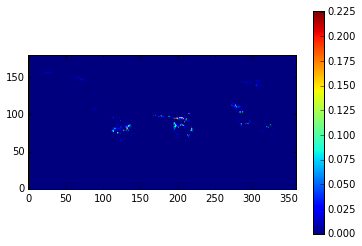

In [17]:
# checking if layers coincide with normal sibcasa run at a yearly scale
# Here I try to reproduce the original sibcasa landcover with the layered runs
# Still have to do this with the complete layers of Erik

fire_mosaic = np.zeros((180,360),float) 
print y
for i in range(180):
    for j in range(360):
        biome = int(biomes_sib[i][j])
        if biome == 0:
            fire_mosaic[i,j] = 0
        if biome == 1:
            fire_mosaic[i,j] = ebf[i,j]
        if biome == 1:
            fire_mosaic[i,j] = ebf[i,j]
        if biome == 2:
            fire_mosaic[i,j] = dbf[i,j]
        if biome == 3:
            fire_mosaic[i,j] = mix[i,j]
        if biome == 4:
            fire_mosaic[i,j] = nlf[i,j]
        if biome == 5:
            fire_mosaic[i,j] = dnf[i,j]
        if biome == 6:
            fire_mosaic[i,j] = grs[i,j]    # originally shv I changed it to see if at the global scale there is a diff by changing all to grs or to sav
        if biome == 7:
            fire_mosaic[i,j] = shv[i,j]    # originally grs 
        if biome == 8:
            fire_mosaic[i,j] = shtv[i,j]
        if biome == 9:
            fire_mosaic[i,j] = shr[i,j]
        if biome == 10:
            fire_mosaic[i,j] = tun[i,j]
        if biome == 11:
            fire_mosaic[i,j] = des[i,j]
        if biome == 12:
            fire_mosaic[i,j] = crp[i,j]

print ((fire_mosaic*mask).sum())/12, (fire_mosaic).sum()/12
    
imshow(fire_mosaic)
colorbar()
plt.gca().invert_yaxis()

# Note: The values for the year 2015 are very strange
- Possibly the run for the ebf biome went wrong. The values below are merging the ones I had before, months 1,2,3 (2015), with the new months.
- When doing the calculation just for the first three months the match coincides as follows:
    - biome 6 in sibcasa as shv and 7 as grs                              Amazon          Global
    - Values for first three months 2015 first run layered method:        0.0208093842951 1.95558017125 
    - Values for first three months 2015 sibcasa standard:                0.0208093842905 1.96566626597
    - First three months of the new run 2015:                             0.0181534080629 1.79741832287
    - Whole year new run with new three months:                           1.1690352887    6.56739472508                                
- This means that the first three months of the old run differ with the new ones. 
- The last run went different that the first one.

In [27]:
#This is a reconstruction of the standard sibcasa landcover with the layers... 
years           = [2010,          2011,             2012,          2013,          2014,           2015]

# Standards runs in Sibcasa, monthly resolution
global_sib      = [2.11655051235,  1.50884054959,   1.9062553679,  1.66646314093,  1.7783433097,  2.03229991245]
amazon_sib      = [0.55166295206,  0.10488800879,   0.3391696055,  0.15365611021,  0.2324186815,  0.32182262464]

# These ones were done with Michiel's Files.
# biome 6 in Sibcasa as grs and 7 as shv
global_layered  = [1.86402821173,  1.22920767343,   1.6259572494,  1.39909963299,  1.5125474206,  ?3.81740881426] 1.79138966553
amazon_layered  = [0.54868182966,  0.10425610833,   0.3386782548,  0.15299550610,  0.2324963169,  ?0.86793831314] 0.32817627308

# biome 6 in Sibcasa as shv and 7 as grs
global_layered  = [2.10735878884,  1.49853163794,   1.8888726599,  1.65256590779,  1.7657607031,  ?4.06637734447] 
amazon_layered  = [0.55166295210,  0.10488800889,   0.3391696056,  0.15365611016,  0.2324186814,  ?0.86836375655]
                                                                        '''with eriks files'''     2.04035819573
                                                                                                   0.32860171648

#diff = []
#for i in range(len(amazon_layered)):
#    diff.append(amazon_layered[i]-amazon_sib[i])
#print diff

[-0.0029811224019999916, -0.0006319004650000015, -0.0004913507350000068, -0.000660604110999996, 7.763542900002252e-05]


2010
0.0224388914935


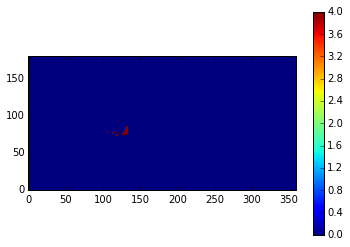

In [33]:
# Fire mosaic per year for the amazon

fire_mosaic = np.zeros((180,360),float) 
biome_mosaic = np.zeros((180,360),float) 
print y
for i in range(180):
    for j in range(360):
        biome = int(biomes_casa_1x1[i,j]) 
        #biome = int(biomes_sib)
        #if biome == 2:
        #    fire_mosaic[i,j] = ebf[i,j]
        #    biome_mosaic[i,j] = 1
        #if biome == 4:
        #    fire_mosaic[i,j] = dbf[i,j]
        #    biome_mosaic[i,j] = 2
        #if biome == 6:
        #    fire_mosaic[i,j] = shr[i,j]
        #    biome_mosaic[i,j] = 3
        if biome == 7:
            fire_mosaic[i,j] = shv[i,j]
            biome_mosaic[i,j] = 4
        #if biome == 9:
        #    fire_mosaic[i,j] = crp[i,j]
        #    biome_mosaic[i,j] = 5
            
print ((fire_mosaic*mask).sum())/12 #, (fire_mosaic).sum()/12 , shape(fire_mosaic)
    
imshow(biome_mosaic*mask)
colorbar()
plt.gca().invert_yaxis()

In [51]:
#This has to be done manually for each year, when opened fresh it has to be manipulated manually
#f2010 = fire_mosaic
#f2011 = fire_mosaic
#f2012 = fire_mosaic
#f2013 = fire_mosaic
#f2014 = fire_mosaic
#f2015 = fire_mosaic


fire_mosaic_all_yrs = np.zeros((6,180,360),float) 

fire_mosaic_all_yrs[0] = f2010
fire_mosaic_all_yrs[1] = f2011
fire_mosaic_all_yrs[2] = f2012
fire_mosaic_all_yrs[3] = f2013
fire_mosaic_all_yrs[4] = f2014
fire_mosaic_all_yrs[5] = f2015
'''
print ((f2015*mask).sum())/12
imshow(f2015*mask)
colorbar()
plt.gca().invert_yaxis()'''


'\n\nprint ((f2015*mask).sum())/12\nimshow(f2015*mask)\ncolorbar()\nplt.gca().invert_yaxis()'

In [52]:
np.save('fire_year_layered_erik_all_grs',fire_mosaic_all_yrs)

In [53]:
# Fire mosaic per month 

print y
fire_mosaic = np.zeros((13,180,360),float) 
for m in range(1,13):
    for i in range(180):
        for j in range(360):
            biome = int(biomes_casa_1x1[i,j]) 
            if biome == 2:
                fire_mosaic[m][i][j] = ebf_monthly[m][i][j]
            if biome == 4:
                fire_mosaic[m][i,j] = dbf_monthly[m][i,j]
            if biome == 6:
                fire_mosaic[m][i,j] = shr_monthly[m][i,j]
            if biome == 7:
                fire_mosaic[m][i,j] = shv_monthly[m][i,j]
            if biome == 9:
                fire_mosaic[m][i,j] = crp_monthly[m][i,j]

yearly_check = sum(((fire_mosaic*mask).sum(axis=1).sum(axis=1))/12)
monthly_values = (fire_mosaic*mask).sum(axis=1).sum(axis=1)
print shape(fire_mosaic), yearly_check, monthly_values

#imshow((fire_mosaic)[1])
#colorbar()
#plt.gca().invert_yaxis()

2015
(13, 180, 360) 0.348519398201 [ 0.          0.03278147  0.03497258  0.04660443  0.00470141  0.07557391
  0.084842    0.12856178  0.83717591  1.75589014  0.74633756  0.32979811
  0.10499348]


In [55]:
# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Grasslands
'''
monthly_values2010 = [1.59694278e-02, 3.44205812e-02, 3.75909534e-02, 3.01815570e-02, 8.48221446e-02, 1.37825707e-01,
                      5.60151404e-01, 4.34526341e+00, 2.04850581e+00, 3.92333894e-01, 5.68107312e-02, 4.31179502e-04]

monthly_values2011 = [2.01221225e-03, 1.91968962e-04, 1.36055896e-04, 2.75346978e-03, 4.50983475e-02, 2.86520390e-02,  
                      1.28052913e-01, 6.45386692e-01, 7.38584067e-01, 6.41633591e-02, 2.98392817e-02,  2.96351639e-02]

monthly_values2012 = [0.03521452, 0.03393159, 0.05029262, 0.01150625, 0.06687955, 0.04858148, 0.15062673, 1.1870409,
                      1.69067863, 0.14714553, 0.08014339, 0.02557558]

monthly_values2013 = [0.06074837, 0.01625897, 0.07070668, 0.02733339, 0.05697758, 0.04583733, 0.10504358, 0.5960655,
                      0.55613184, 0.06719321, 0.04243416, 0.0182261]

monthly_values2014 = [0.04584135, 0.01719947, 0.01932713, 0.01750817,  0.08400658, 0.07538333, 0.09700453, 1.0030752,
                      0.80706796, 0.37652396, 0.06870215, 0.01580085]

monthly_values2015 = [0,0,0,0,0,0,0,0,0,0,0,0]

merged = itertools.chain(monthly_values2010, monthly_values2011, monthly_values2012,
                         monthly_values2013, monthly_values2014, monthly_values2015)

# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Savanna

monthly_values2010 = [1.60454962e-02, 3.45033683e-02, 3.78562204e-02, 3.13127926e-02, 8.94826126e-02, 1.51400322e-01,
                      5.88750822e-01, 4.44883779e+00, 2.15596221e+00, 3.92938369e-01, 5.70928801e-02, 4.80412190e-04]

monthly_values2011 = [2.17165297e-03, 1.97191088e-04, 1.56304333e-04, 2.85314341e-03, 4.68503895e-02, 3.22755466e-02,
                      1.34289419e-01, 6.61823084e-01, 7.70764090e-01, 6.42055861e-02, 2.98709944e-02, 2.96622025e-02]

monthly_values2012 = [0.03539644, 0.03409886, 0.05085012, 0.01183867, 0.06809951, 0.05170155, 0.16277228, 1.23471135, 
                      1.77469012, 0.16618062, 0.08038368, 0.02571694]

monthly_values2013 = [0.06095043, 0.01649677, 0.07133516, 0.02763954, 0.05796219, 0.04798216, 0.11195157, 0.61803966,
                      0.58870163, 0.07319344, 0.04268511, 0.01836218]

monthly_values2014 = [0.04606281, 0.01735455, 0.0198013, 0.01790767, 0.08533929, 0.07942735, 0.10564409, 1.03614035,
                      0.85019506, 0.39906415, 0.06930807, 0.01615711]

monthly_values2015 = [0,0,0,0,0,0,0,0,0,0,0,0]
'''

# Erik Runs
# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Grasslands
monthly_values2010 = [  1.76297462e-02,   3.69025687e-02,   3.97115853e-02,   3.21304056e-02,   8.95200822e-02,
                        1.49443650e-01,   5.98962862e-01,   4.58473819e+00,   2.14742456e+00,   4.12068465e-01,
                        5.77464935e-02,   4.43432943e-04]
monthly_values2011 = [  2.05530692e-03,   1.99283834e-04,   1.55353361e-04,   2.91469650e-03,   4.68479526e-02,
                        2.99818508e-02,   1.38191966e-01,   6.83008905e-01,   7.81793337e-01,   6.64116652e-02,
                        3.11318561e-02,   3.00646085e-02]
monthly_values2012 = [  0.03554661,  0.03451252,  0.05314641,  0.01212317,  0.06952327,  0.05071606,  0.15712503,
                        1.23048123,  1.76126215,  0.14980209,  0.07652076,  0.02553949]

monthly_values2013 = [  0.0617966,   0.01675574,  0.07433982,  0.02831906,  0.05951552,  0.0476639,   0.10927668,
                        0.62195126,  0.58049067,  0.06909347,  0.04286508,  0.01834073]

monthly_values2014 = [  0.04596724,  0.01730582,  0.02041818,  0.01825333,  0.0876005,   0.07833372,  0.10113912,
                        1.03831803,  0.83788829,  0.38138424,  0.06670083,  0.01580882]

monthly_values2015 = [  0.03226169,  0.03448986,  0.04620623,  0.00463449,  0.07424596,  0.08131232,  0.12240895,
                        0.81639022,  1.69881477,  0.71466985,  0.32696097,  0.10367783] 
'''
# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Savanna
monthly_values2010 = [  1.77073048e-02,   3.69870065e-02,   3.99804598e-02,   3.32738571e-02,
                        9.42509443e-02,   1.63155864e-01,   6.27854668e-01,   4.68967599e+00,   2.25590685e+00,
                        4.12681744e-01,   5.80319511e-02,   4.93218021e-04]

monthly_values2011 = [  2.21812393e-03,   2.04616694e-04,   1.75789477e-04,   3.01536300e-03,  4.86194462e-02,
                        3.36470263e-02,   1.44488467e-01,   6.99616260e-01,   8.14259529e-01,  6.64543910e-02,
                        3.11640342e-02,   3.00926449e-02]

monthly_values2012 = [  0.03573229,  0.03468227,  0.05371097,  0.01245879,  0.07075304,  0.05386537,  0.16937623,
                        1.27855863,  1.8460709,   0.16899961,  0.07676424,   0.02568211]

monthly_values2013 = [  0.06200193,  0.01699707,  0.07497519,  0.02862805,  0.06050768,  0.04982717,  0.11624631,
                        0.64424251,  0.61332797,  0.07515468,  0.04311987,  0.01847897]

monthly_values2014 = [  0.04619242,  0.01746372,  0.02089833,  0.0186559,   0.08894381,  0.08241035,  0.10984363,
                        1.07159115,  0.88134624,  0.40415079,  0.06731217,  0.01616864]

monthly_values2015 = [  0.03278147,  0.03497258,  0.04660443,  0.00470141,  0.07557391,  0.084842,    0.12856178,
                        0.83717591,  1.75589014,  0.74633756,  0.32979811,  0.10499348]'''

merged = itertools.chain(monthly_values2010, monthly_values2011, monthly_values2012,
                         monthly_values2013, monthly_values2014, monthly_values2015)
allbb = []
for i in merged:
    allbb.append(i)
print len(allbb), allbb


72 [0.0176297462, 0.0369025687, 0.0397115853, 0.0321304056, 0.0895200822, 0.14944365, 0.598962862, 4.58473819, 2.14742456, 0.412068465, 0.0577464935, 0.000443432943, 0.00205530692, 0.000199283834, 0.000155353361, 0.0029146965, 0.0468479526, 0.0299818508, 0.138191966, 0.683008905, 0.781793337, 0.0664116652, 0.0311318561, 0.0300646085, 0.03554661, 0.03451252, 0.05314641, 0.01212317, 0.06952327, 0.05071606, 0.15712503, 1.23048123, 1.76126215, 0.14980209, 0.07652076, 0.02553949, 0.0617966, 0.01675574, 0.07433982, 0.02831906, 0.05951552, 0.0476639, 0.10927668, 0.62195126, 0.58049067, 0.06909347, 0.04286508, 0.01834073, 0.04596724, 0.01730582, 0.02041818, 0.01825333, 0.0876005, 0.07833372, 0.10113912, 1.03831803, 0.83788829, 0.38138424, 0.06670083, 0.01580882, 0.03226169, 0.03448986, 0.04620623, 0.00463449, 0.07424596, 0.08131232, 0.12240895, 0.81639022, 1.69881477, 0.71466985, 0.32696097, 0.10367783]


SiBCASA_GFED4 [2010, 2011, 2012, 2013, 2014, 2015] [0.541, 0.101, 0.334, 0.148, 0.233, 0.319]
GFAS [2010, 2011, 2012, 2013, 2014, 2015] [0.241, 0.08, 0.109, 0.057, 0.088, 0.117]
FINN [2010, 2011, 2012, 2013, 2014, 2015] [0.41, 0.173, 0.238, 0.151, 0.051, 0.158]
CASA_GFED4 [2010, 2011, 2012, 2013, 2014, 2015] [0.467, 0.095, 0.195, 0.082, 0.15, 0.199]
SiBCASA_GFED4_CASA_LC_AllGras [2010, 2011, 2012, 2013, 2014, 2015] [0.68, 0.151, 0.304, 0.144, 0.225, 0.338]
SiBCASA_GFED4_CASA_AllSav [2010, 2011, 2012, 2013, 2014, 2015] [0.702, 0.156, 0.318, 0.15, 0.235, 0.348]


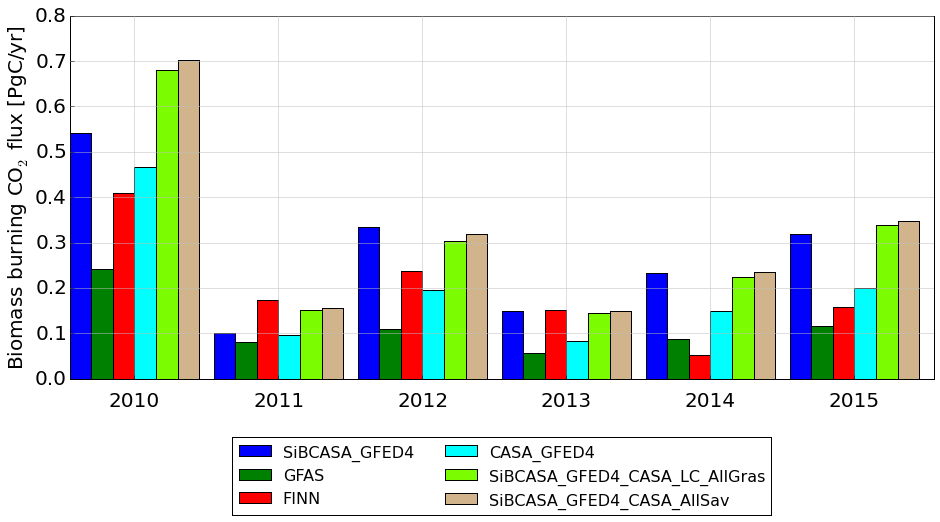

In [46]:
# Merged fire product analysis
# These results were obtained with CASA biome Savanna and Grasslands = SiBCASA Grasslands

SiBCASA_GFED4          = [0.541, 0.101, 0.334, 0.148, 0.233, 0.319]
GFAS                   = [0.241, 0.080, 0.109, 0.057, 0.088, 0.117]
FINN                   = [0.410, 0.173, 0.238, 0.151, 0.051, 0.158]
CASA_GFED4             = [0.467, 0.095, 0.195, 0.082, 0.150, 0.199] 
#SiBCASA_GFED4_CASA_LC  = [0.645, 0.142, 0.294, 0.139, 0.219, 0]    # Savanna and grasslands (CASA) as Grasslands (Sibcasa)
#SiBCASA_GFED4_CASA_LC2 = [0.667, 0.147, 0.308, 0.144, 0.228, 0]    # Savanna and grasslands (CASA) as Savanna (Sibcasa)
# Savanna and grasslands (CASA) as Grasslands (Sibcasa)
amazon_layered_allbiomes_erik  = [0.680, 0.151, 0.304, 0.144, 0.225, 0.338]
# Savanna and grasslands (CASA) as Savanna (Sibcasa)
amazon_layered_allbiomes_erik2 = [0.702, 0.156, 0.318, 0.150, 0.235, 0.348]

emissions = [SiBCASA_GFED4,GFAS,FINN,CASA_GFED4,amazon_layered_allbiomes_erik,amazon_layered_allbiomes_erik2]
labels = ['SiBCASA_GFED4','GFAS','FINN','CASA_GFED4','SiBCASA_GFED4_CASA_LC_AllGras','SiBCASA_GFED4_CASA_AllSav']

minyear = 2010
maxyear = 2016
years = range(minyear,maxyear)

fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
bar_width = 0.15

for ii,dirbf in enumerate(labels):
    #print ii, dirbf
    alltimes = []
    allbb = []
    for y in range(len(years)):
        #print years[y]
        alltimes.append(years[y])
        bb_year = emissions[ii][y]
        allbb.append(bb_year)
    print labels[ii], alltimes, allbb
    index = np.array(alltimes)
    #ax.plot(alltimes,allbb,'o',markersize=8,label=labels[ii],lw=2) 
    
    if ii == 0: ax.bar(index, allbb, bar_width, color='blue',label=labels[ii])
    if ii == 1: ax.bar(index+bar_width, allbb, bar_width, color='green',label=labels[ii])
    if ii == 2: ax.bar(index+bar_width*ii, allbb, bar_width, color='red',label=labels[ii])
    if ii == 3: ax.bar(index+bar_width*ii, allbb, bar_width, color='cyan',label=labels[ii])
    if ii == 4: ax.bar(index+bar_width*ii, allbb, bar_width, color='lawngreen',label=labels[ii])   
    if ii == 5: ax.bar(index+bar_width*ii, allbb, bar_width, color='tan',label=labels[ii])    

plt.xticks(index + (bar_width*6 / 2), ('2010', '2011', '2012', '2013', '2014','2015'))  
        
ax.set_ylim(0,0.8)
#ax.set_xlim(2009,2016)
#ax.set_xticklabels(np.arange(2009,2016))
#ax.set_xlim(dt.date(2010,1,1),dt.date(2015,1,1))
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning CO$_2$ flux [PgC/yr]',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]   
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
fig.savefig('Yearly_values_allsav_grs.png',bbox_inches='tight',DPI=1000)

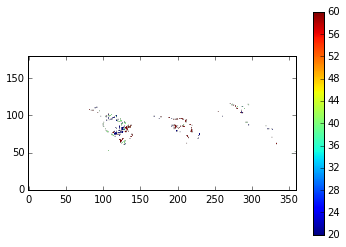

In [15]:
# Checking the pixel assignation

biome_mosaic = np.zeros((180,360),float) 
test = np.zeros((180,360),float)
for i in range(180):
    for j in range(360):
        biome_casa = int(biomes_casa_1x1[i,j]) 
        biome_sib = int(biomes_sib[i,j])
        
        if biome_casa == 2 and biome_sib == 6: # Pixels that are EBF in Casa and are Savanna in SiBCASA
            biome_mosaic[i,j] = 20
            test[i,j] = 1
        if biome_casa == 2 and biome_sib == 7: # Pixels that are EBF in Casa and are Grasslands in SiBCASA
            biome_mosaic[i,j] = 40
            test[i,j] = 1
        
        if biome_casa == 7 and biome_sib == 1: # Pixels that are Savanna and Grs in Casa and are Forest in SiBCASA
            biome_mosaic[i,j] = 60
            test[i,j] = 1
        
biome_mosaic_masked = np.ma.masked_equal(biome_mosaic, 0)        
imshow(biome_mosaic_masked)
colorbar()
plt.gca().invert_yaxis()
mask_masked = np.ma.masked_equal(mask, 0)

1313074.77162


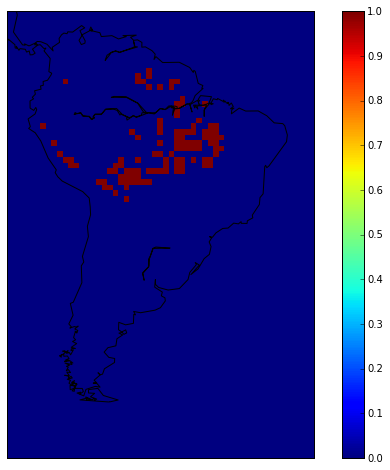

In [16]:
print (test*glarea*mask).sum()/1e6
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()
#cmap = colors.ListedColormap(['green','yellow','magenta'])
cax = m.pcolormesh(xx,yy,test*mask)
colorbar()
plt.show()

In [17]:
def make_map(fill_color = True):
    m,nx,ny = select_map('South America Albers')
    m.drawcoastlines(color='grey',linewidth=0.5)
    m.drawcountries(color='grey',linewidth=0.5) 
    if fill_color:
        m.drawmapboundary(fill_color='#d8d8d8')
        m.drawparallels(np.arange(-90,91,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,0],fontsize=13)
        m.drawmeridians(np.arange(-180,180,15),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,0],fontsize=13)
    return m,nx,ny

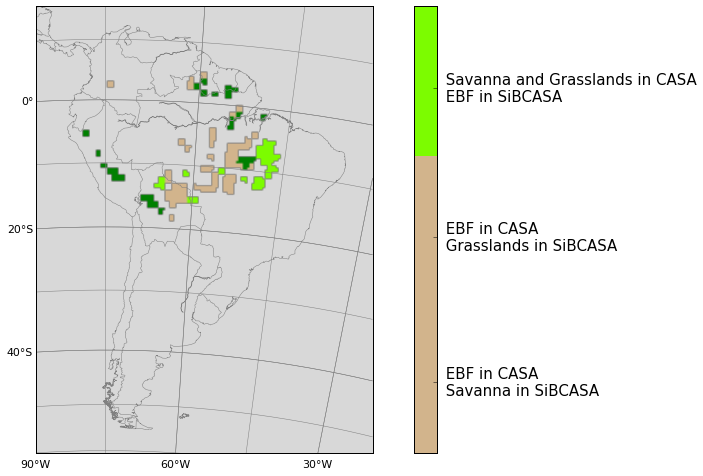

In [27]:
from matplotlib import colors

fig = plt.figure(1,figsize=(15,8))
lons=np.arange(-179.5,180,1)
lats=np.arange(-89.5,90,1)
m,nx,ny = make_map()
m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fluxmap = m.transform_scalar((biome_mosaic_masked*mask_masked),lons,lats,nx,ny,order=0)
cmap = colors.ListedColormap(['tan','green','lawngreen'])
norm = None
q = m.imshow(fluxmap,cmap=cmap,norm=norm)
bounds=[0,21,41,61]
cbar = plt.colorbar(q, cmap=cmap, boundaries=bounds,ticks=[10, 30, 50])
cbar.ax.set_yticklabels([' EBF in CASA \n Savanna in SiBCASA', ' EBF in CASA \n Grasslands in SiBCASA',
                         ' Savanna and Grasslands in CASA \n EBF in SiBCASA'],fontsize=15)
plt.show()
#fig.savefig('SpatialMismatch.png',bbox_inches='tight',DPI=1000)

# ABOVEGROUND BIOMASS ANALYSIS

In [20]:
filename           = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-SiB',2010,10)
d                  = cdf.Dataset(filename)
abg                = d.variables['carb_awood'][:]*12/1000 # The fire rate for each land points (umol/m2 s) shape = (1,14538)
total_live_biomass = d.variables['carb_live'][:]*12/1000
latindex           = d.variables['latindex'][:]
lonindex           = d.variables['lonindex'][:]
abg                = fire_to_1x1(abg,latindex,lonindex)
total_live_biomass = fire_to_1x1(total_live_biomass,latindex,lonindex)

numpy.ndarray

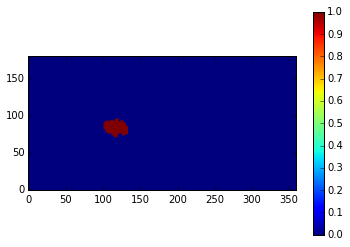

In [21]:
imshow(mask)
colorbar()
plt.gca().invert_yaxis()

type(mask)

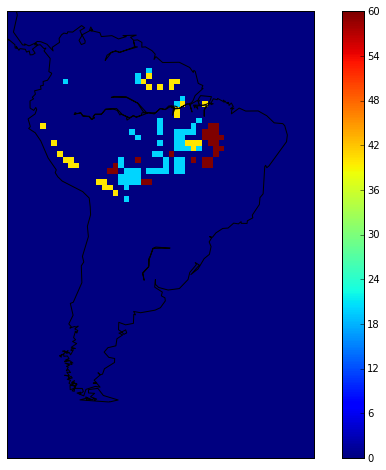

In [22]:
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()
#cmap = colors.ListedColormap(['green','yellow','magenta'])
cax = m.pcolormesh(xx,yy,biome_mosaic*mask)
colorbar()
plt.show()
#imshow(total_live_biomass)
#colorbar()
#plt.gca().invert_yaxis()

In [37]:
sava                     = np.zeros((180,360),float) 
ebf                      = np.zeros((180,360),float) 
gras                     = np.zeros((180,360),float) 

for i in range(180):
    for j in range(360):
        biome_sib = int((biomes_sib*mask)[i,j])
        if biome_sib == 7:
            gras[i][j] = 1 
        if biome_sib == 1:
            ebf[i][j] = 1
        if biome_sib == 6:
            sava[i][j] = 1

84 1288.07700488 1639.14826939 559.978069594 498.095637181


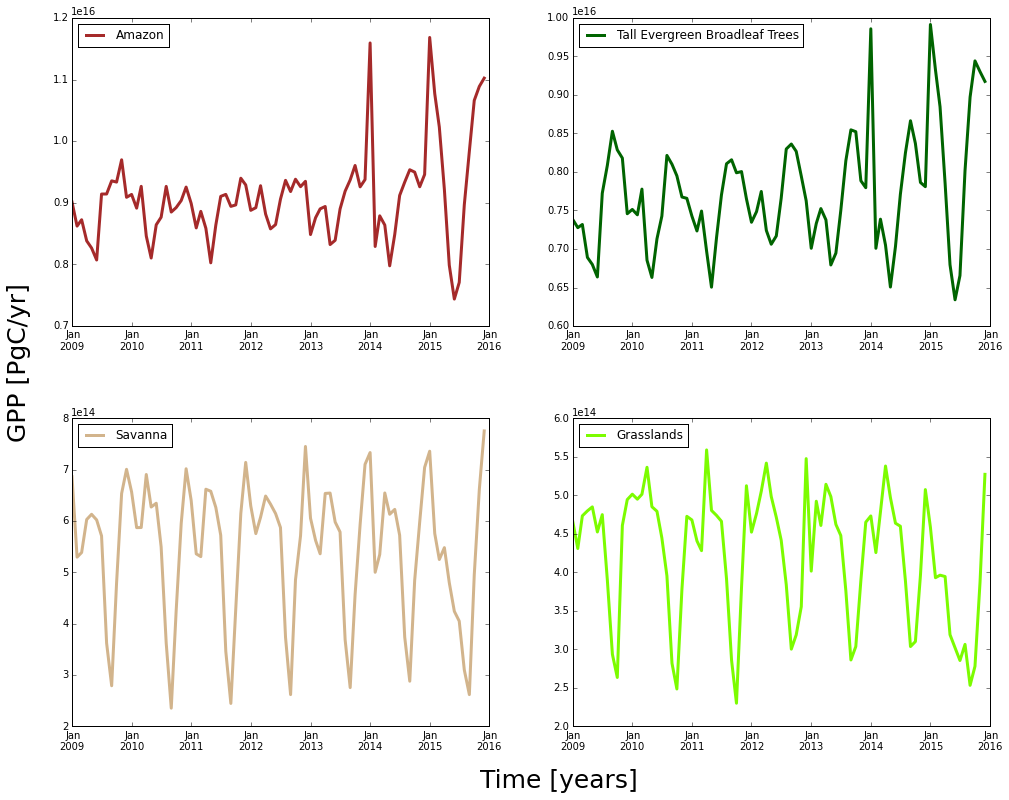

In [42]:
fig,axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(-0.01, 0.5, 'GPP [PgC/yr]', va='center', rotation='vertical',fontsize=25)
#fig.text(-0.01, 0.5, 'Aboveground carbon biomass [PgC]', va='center', rotation='vertical',fontsize=25)
fig.text(0.5, 0.009, 'Time [years]', ha='center',fontsize=25)

minyear = 2009
maxyear = 2016
sava_month = []
gras_month = []
ebf_month  = []
alltimes   = []
amazon     = []

for y in range(minyear,maxyear):
    for k in range(1,13):
        ff                       = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-SiB',y,k)
        f                        = cdf.Dataset(ff)
        #abg                      = f.variables['carb_awood'][:]*12*1e-15 # 
        #litter                   = f.variables['carb_litter'][:]*12*1e-15
        #total_live_biomass       = f.variables['carb_awood'][:]*12*1e-15  #(86400*365)*12*1e-6*1e-15
        total_live_biomass       = f.variables['npp'][:]*(86400*365)*12*1e-6 # gC yr-1 m-2
        #total_live_biomass       = abg
        latindex                 = f.variables['latindex'][:]
        lonindex                 = f.variables['lonindex'][:]
        total_live_biomass_1x1   = fire_to_1x1(total_live_biomass,latindex,lonindex) #kg/m2 per pixel
        
        sava_month.append(((total_live_biomass_1x1 * sava)*glarea).sum())
        gras_month.append(((total_live_biomass_1x1 * gras)*glarea).sum())
        ebf_month.append(((total_live_biomass_1x1 * ebf)*glarea).sum())
        amazon.append(((total_live_biomass_1x1 * mask)*glarea).sum())
        
        month = dt.date(y,k,1)
        alltimes.append(month)
# NPP mean for amazon, ebf, sav and gra. Given in gC m-2 yr-1        
print len(amazon), mean(amazon)/((mask*glarea).sum()), mean(ebf_month)/((ebf*glarea).sum()), mean(sava_month)/((sava*glarea).sum()), mean(gras_month)/((gras*glarea).sum())              

ax1 = plt.subplot(221)        
ax1.plot(alltimes,amazon,color='brown',label='Amazon',linewidth = 3)
ax1.legend(loc = 'upper left')
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))

ax1 = plt.subplot(222) 
ax1.plot(alltimes,ebf_month,color='darkgreen',label='Tall Evergreen Broadleaf Trees',linewidth = 3)
ax1.legend(loc = 'upper left')
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

ax1 = plt.subplot(223)
ax1.plot(alltimes,sava_month,color='tan',label='Savanna',linewidth = 3)
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

ax1 = plt.subplot(224)
ax1.plot(alltimes,gras_month,color='lawngreen',label='Grasslands',linewidth = 3)
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')
fig.savefig('npp.png',bbox_inches='tight',DPI=1000)
#fig.savefig('Carb_awood_PgC.png',bbox_inches='tight',DPI=1000)

In [46]:
print mean(amazon)/(mask*glarea).sum(), sum(amazon)/84

1288.07700488 9.07855085135e+15


25.5352662351 23.4097542288 1.28759268373 0.0958594049069


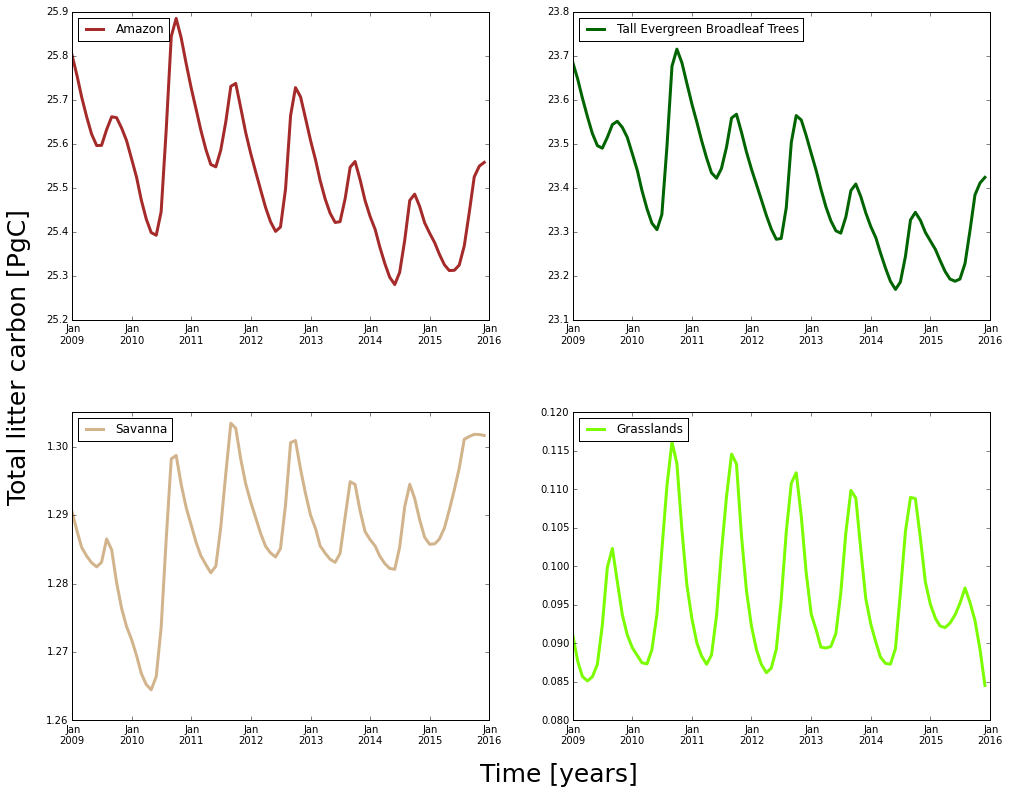

In [41]:
fig,axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(-0.01, 0.5, 'Total litter carbon [PgC]', va='center', rotation='vertical',fontsize=25)
fig.text(0.5, 0.009, 'Time [years]', ha='center',fontsize=25)

minyear = 2009
maxyear = 2016
sava_month = []
gras_month = []
ebf_month  = []
alltimes   = []
amazon     = []

for y in range(minyear,maxyear):
    for k in range(1,13):
        ff                       = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-SiB',y,k)
        f                        = cdf.Dataset(ff)
        #abg                      = f.variables['carb_awood'][:]*12*1e-15 # 
        #litter                   = f.variables['carb_litter'][:]*12*1e-15
        total_live_biomass       = f.variables['carb_litter'][:]*12*1e-15  
        #total_live_biomass       = abg
        latindex                 = f.variables['latindex'][:]
        lonindex                 = f.variables['lonindex'][:]
        total_live_biomass_1x1   = fire_to_1x1(total_live_biomass,latindex,lonindex) #kg/m2 per pixel
        
        sava_month.append(((total_live_biomass_1x1 * sava)*glarea).sum())
        gras_month.append(((total_live_biomass_1x1 * gras)*glarea).sum())
        ebf_month.append(((total_live_biomass_1x1 * ebf)*glarea).sum())
        amazon.append(((total_live_biomass_1x1 * mask)*glarea).sum())
        
        month = dt.date(y,k,1)
        alltimes.append(month)
        
print mean(amazon), mean(ebf_month), mean(sava_month), mean(gras_month)

ax1 = plt.subplot(221)        
ax1.plot(alltimes,amazon,color='brown',label='Amazon',linewidth = 3)
ax1.legend(loc = 'upper left')
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))

ax1 = plt.subplot(222) 
ax1.plot(alltimes,ebf_month,color='darkgreen',label='Tall Evergreen Broadleaf Trees',linewidth = 3)
ax1.legend(loc = 'upper left')
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

ax1 = plt.subplot(223)
ax1.plot(alltimes,sava_month,color='tan',label='Savanna',linewidth = 3)
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

ax1 = plt.subplot(224)
ax1.plot(alltimes,gras_month,color='lawngreen',label='Grasslands',linewidth = 3)
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')
#fig.savefig('Carb_litter_PgC.png',bbox_inches='tight',DPI=1000)

In [27]:
#abg wood
print (111/7048142.9)*(1/1000**2)*1e12, 'KgC/m2 - Amazon'
print (104.75/4.71e6)*(1/1000**2)*1e12, 'KgC/m2 - EBF'
print (3.8/0.97e6)*(1/1000**2)*1e12, 'KgC/m2 - Sav'
print (0.055/0.84e6)*(1/1000**2)*1e12, 'KgC/m2 - Gras'

15.7488293831 KgC/m2 - Amazon
22.2399150743 KgC/m2 - EBF
3.9175257732 KgC/m2 - Sav
0.0654761904762 KgC/m2 - Gras


In [131]:
#Living
print (153/7048142.9)*(1/1000**2)*1e12, 'KgC/m2 - Amazon'
print (143.75/4.71e6)*(1/1000**2)*1e12, 'KgC/m2 - EBF'
print (5.36/0.97e6)*(1/1000**2)*1e12, 'KgC/m2 - Sav'
print (0.3/0.84e6)*(1/1000**2)*1e12, 'KgC/m2 - Gras'

21.7078459065 KgC/m2 - Amazon
30.5201698514 KgC/m2 - EBF
5.52577319588 KgC/m2 - Sav
0.357142857143 KgC/m2 - Gras


In [52]:
#Dead pool total
print (70/7048142.9)*(1/1000**2)*1e12, 'KgC/m2 - Amazon'
print (63/4.71e6)*(1/1000**2)*1e12, 'KgC/m2 - EBF'
print (3.88/0.97e6)*(1/1000**2)*1e12, 'KgC/m2 - Sav'
print (1.9/0.84e6)*(1/1000**2)*1e12, 'KgC/m2 - Gras'

9.93169420558 KgC/m2 - Amazon
13.3757961783 KgC/m2 - EBF
4.0 KgC/m2 - Sav
2.2619047619 KgC/m2 - Gras


In [55]:
#Litter
print (25.8/7048142.9)*(1/1000**2)*1e12, 'KgC/m2 - Amazon'
print (23.7/4.71e6)*(1/1000**2)*1e12, 'KgC/m2 - EBF'
print (1.3/0.97e6)*(1/1000**2)*1e12, 'KgC/m2 - Sav'
print (0.09/0.84e6)*(1/1000**2)*1e12, 'KgC/m2 - Gras'

3.66053872148 KgC/m2 - Amazon
5.03184713376 KgC/m2 - EBF
1.34020618557 KgC/m2 - Sav
0.107142857143 KgC/m2 - Gras


In [56]:
#cwd
print (9.9 - 3.6), 'KgC/m2 - Amazon'
print (13.3-5), 'KgC/m2 - EBF'
print (4-1.34), 'KgC/m2 - Sav'
print (2.26-0.10), 'KgC/m2 - Gras'

6.3 KgC/m2 - Amazon
8.3 KgC/m2 - EBF
2.66 KgC/m2 - Sav
2.16 KgC/m2 - Gras


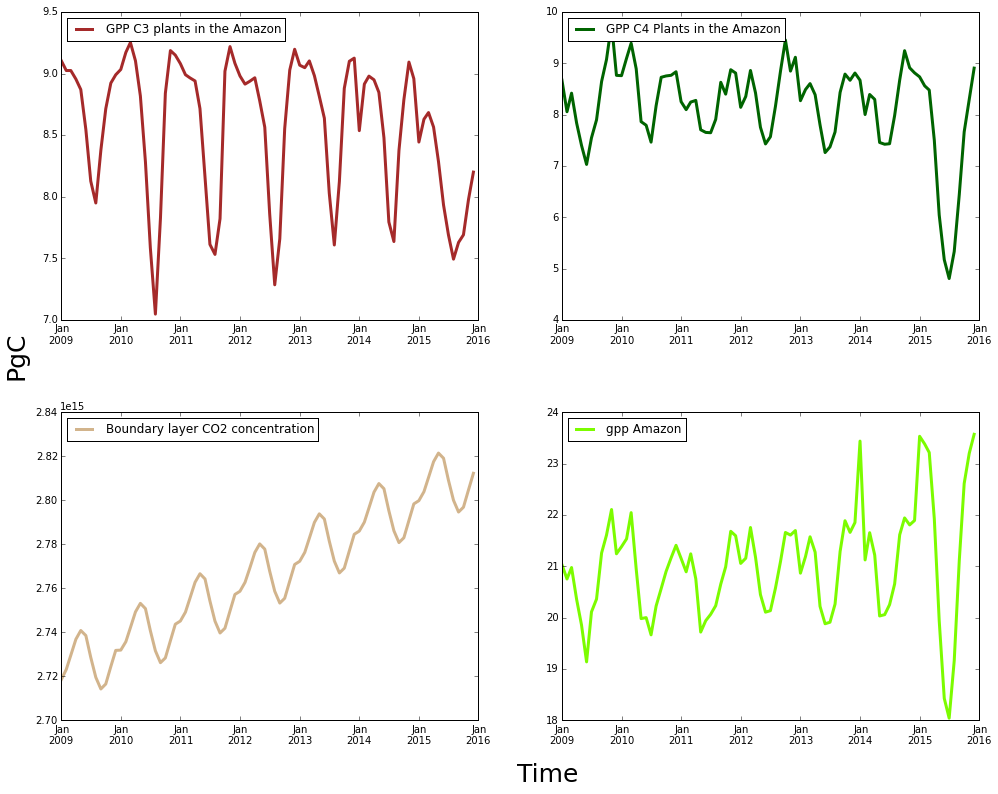

In [117]:
fig,axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'PgC', va='center', rotation='vertical',fontsize=25)
fig.text(0.5, 0.009, 'Time', ha='center',fontsize=25)

minyear = 2009
maxyear = 2016

gpp_c3_amazon   = []
gpp_c4_amazon   = []
resp_het_amazon = []
pco2m_amazon    = []
gpp_amazon      = []
alltimes        = []

for y in range(minyear,maxyear):
    for k in range(1,13):
        ff                       = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-SiB',y,k)
        f                        = cdf.Dataset(ff)
        gpp_c3                   = f.variables['gpp_c3'][:] * (86400*365)*12*1e-6*1e-15 #PgC/m2
        gpp_c4                   = f.variables['gpp_c4'][:] * (86400*365)*12*1e-6*1e-15
        resp_het                 = f.variables['resp_het'][:] * (86400*365)*12*1e-6*1e-15
        pco2m                    = f.variables['pco2m'][:] #ppmv
        gpp                      = f.variables['gpp'][:] * (86400*365)*12*1e-6*1e-15
        latindex                 = f.variables['latindex'][:]
        lonindex                 = f.variables['lonindex'][:]
        
        gpp_c3_1x1               = fire_to_1x1(gpp_c3,latindex,lonindex)
        gpp_c4_1x1               = fire_to_1x1(gpp_c4,latindex,lonindex)
        pco2m_1x1                = fire_to_1x1(pco2m,latindex,lonindex)
        gpp_1x1                  = fire_to_1x1(gpp,latindex,lonindex)
        resp_het_1x1             = fire_to_1x1(resp_het,latindex,lonindex)
        
        gpp_c3_amazon.append(((gpp_c3_1x1 * mask)*glarea).sum())
        gpp_c4_amazon.append(((gpp_c4_1x1 * mask)*glarea).sum())
        pco2m_amazon.append(((pco2m_1x1 * mask)*glarea).sum())
        gpp_amazon.append(((gpp_1x1 * mask)*glarea).sum())
        resp_het_amazon.append(((resp_het_1x1 * mask)*glarea).sum())
        
        #gpp_c3_sava_month.append(((gpp_c3_1x1 * sava)*glarea).sum())
        #gras_month.append(((total_live_biomass_1x1 * gras)*glarea).sum())
        #ebf_month.append(((total_live_biomass_1x1 * ebf)*glarea).sum())
        #gpp_amazon.append(((total_live_biomass_1x1 * mask)*glarea).sum())
        
        month = dt.date(y,k,1)
        alltimes.append(month)

ax1 = plt.subplot(221)        
ax1.plot(alltimes,resp_het_amazon,color='brown',label='GPP C3 plants in the Amazon',linewidth = 3)
ax1.legend(loc = 'upper left')
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))

ax1 = plt.subplot(222) 
ax1.plot(alltimes,gpp_c4_amazon,color='darkgreen',label='GPP C4 Plants in the Amazon',linewidth = 3)
ax1.legend(loc = 'upper left')
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

ax1 = plt.subplot(223)
ax1.plot(alltimes,pco2m_amazon,color='tan',label='Boundary layer CO2 concentration',linewidth = 3)
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

ax1 = plt.subplot(224)
ax1.plot(alltimes,gpp_amazon, color='lawngreen',label='gpp Amazon',linewidth = 3)
ax1.set_xlim(dt.date(2009,1,1),dt.date(2016,1,1))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax1.legend(loc = 'upper left')

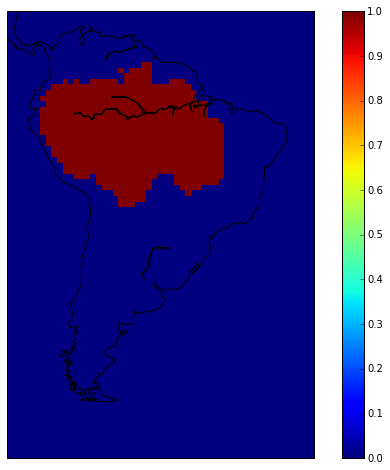

7048142.94251 km2


In [30]:
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()

area_amazon = (mask*glarea).sum()/1e6
cax = m.pcolormesh(xx,yy,mask)
colorbar()
plt.show()

print area_amazon,'km2'

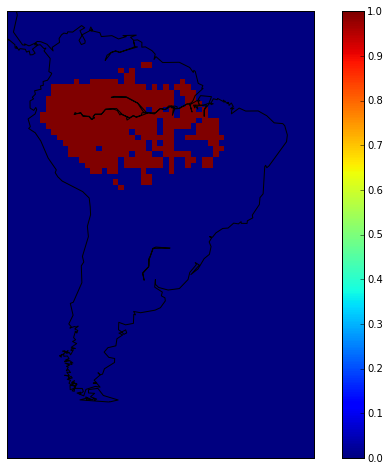

4714273.03498 km2 66.8867398608


In [33]:
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()

area_ebf = (ebf*glarea).sum()/1e6

cax = m.pcolormesh(xx,yy,ebf)
colorbar()
plt.show()
print area_ebf,'km2',area_ebf/area_amazon*100

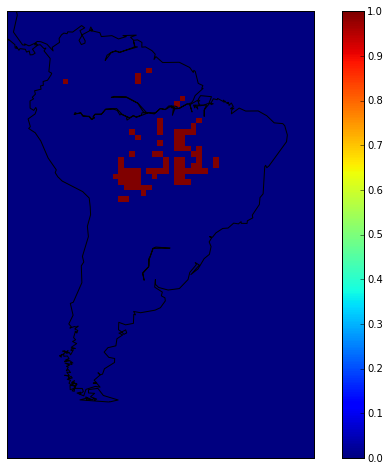

979284.104752 km2 13.8942145859


In [35]:
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()

area_sava = (sava*glarea).sum()/1e6

cax = m.pcolormesh(xx,yy,sava)
colorbar()
plt.show()
print area_sava,'km2', area_sava/area_amazon*100

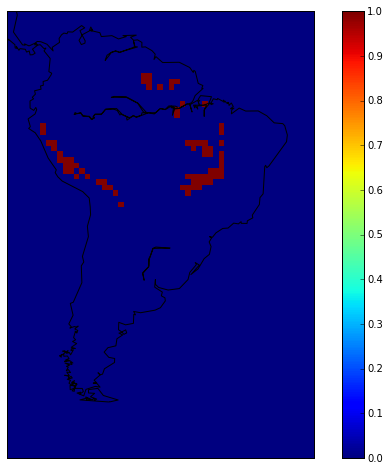

847245.65682 km2 12.0208353283


In [36]:
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()

area_gras = (gras*glarea).sum()/1e6

cax = m.pcolormesh(xx,yy,gras)
colorbar()
plt.show()
print area_gras,'km2', area_gras/area_amazon*100

In [38]:
alld = ((area_ebf+area_gras+area_sava)/area_amazon)*100
alld

92.801789774985878

# Revisar estas areas con las otras que ya calculé